In [1]:
import numpy as np 
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Online+Retail.csv')
df['InvoiceNo']=df['InvoiceNo'].str.replace(r'\D','').astype(int)

In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  int32  
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 31.0+ MB


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df= df.dropna(subset=['CustomerID'])

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.duplicated().sum()

5225

In [9]:
df = df.drop_duplicates()

In [10]:
df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000,401604.000000
mean,560556.192697,12.183273,3.474064,15281.160818
std,13086.492821,250.283037,69.764035,1714.006089
min,536365.000000,-80995.000000,0.000000,12346.000000
25%,549130.000000,2.000000,1.250000,13939.000000
50%,561814.000000,5.000000,1.950000,15145.000000
75%,572033.250000,12.000000,3.750000,16784.000000
max,581587.000000,80995.000000,38970.000000,18287.000000


In [11]:
df=df[(df['Quantity']>0) & (df['UnitPrice']>0)]
df.describe() 

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000,392692.000000
mean,560590.875047,13.119702,3.125914,15287.843865
std,13087.063759,180.492832,22.241836,1713.539549
min,536365.000000,1.000000,0.001000,12346.000000
25%,549234.000000,2.000000,1.250000,13955.000000
50%,561874.000000,6.000000,1.950000,15150.000000
75%,572061.000000,12.000000,3.750000,16791.000000
max,581587.000000,80995.000000,8142.750000,18287.000000


In [12]:
df.shape

(392692, 8)

# cohort analysis

In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [19]:
df_cohort = df.copy()

In [20]:
print('The minimum date is:',df.InvoiceDate.min())
print('The maximum date is:',df.InvoiceDate.max())

The minimum date is: 2010-01-12 08:26:00
The maximum date is: 2011-12-10 17:19:00


In [21]:
# creating the first variable 'Invoice Month'
# extracting only year-month from Invoice Date and day will be 1 automatically

df_cohort['InvoiceMonth'] = df_cohort['InvoiceDate'].dt.strftime('%Y-%m')
# converting the variable to datetime format
df_cohort['InvoiceMonth'] = pd.to_datetime(df_cohort['InvoiceMonth'])

In [22]:
# creating the second variable 'Cohort Month'
# getting the first time purchase date for each customer

df_cohort['CohortMonth'] = df_cohort.groupby('CustomerID')['InvoiceMonth'].transform('min')
# converting the variable to datetime format
df_cohort['CohortMonth'] = pd.to_datetime(df_cohort['CohortMonth'])

In [23]:
df_cohort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     392692 non-null  int32         
 1   StockCode     392692 non-null  object        
 2   Description   392692 non-null  object        
 3   Quantity      392692 non-null  int64         
 4   InvoiceDate   392692 non-null  datetime64[ns]
 5   UnitPrice     392692 non-null  float64       
 6   CustomerID    392692 non-null  float64       
 7   Country       392692 non-null  object        
 8   InvoiceMonth  392692 non-null  datetime64[ns]
 9   CohortMonth   392692 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int32(1), int64(1), object(3)
memory usage: 31.5+ MB


In [24]:
# creating the third variable 'Cohort Period'
# for this we create a function which calculates the number of month between their first purchase date and Invoice date

def diff_month(d1, d2):
    return((d1.dt.year - d2.dt.year) * 12 + d1.dt.month - d2.dt.month)

df_cohort['CohortPeriod'] = diff_month(df_cohort['InvoiceMonth'], df_cohort['CohortMonth'])

In [25]:
df_cohort.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortPeriod
143804,548712,47566B,TEA TIME PARTY BUNTING,6,2011-03-04 14:42:00,4.95,17050.0,United Kingdom,2011-03-01,2011-02-01,1
517248,580048,23391,I LOVE LONDON MINI BACKPACK,1,2011-01-12 12:53:00,4.15,12748.0,United Kingdom,2011-01-01,2010-01-01,12
282399,561647,23197,SKETCHBOOK MAGNETIC SHOPPING LIST,48,2011-07-28 15:20:00,1.25,13340.0,United Kingdom,2011-07-01,2011-07-01,0
380710,569833,21880,RED RETROSPOT TAPE,12,2011-06-10 12:56:00,0.65,15306.0,United Kingdom,2011-06-01,2011-06-01,0
498040,578508,82582,AREA PATROLLED METAL SIGN,1,2011-11-24 13:06:00,2.10,16892.0,United Kingdom,2011-11-01,2011-08-01,3


In [26]:
customer_cohort = df_cohort.pivot_table(index='CohortMonth', columns='CohortPeriod', values='CustomerID', aggfunc='nunique')
customer_cohort

CohortPeriod,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2010-01-01,95.0,6.0,4.0,NaN,5.0,7.0,3.0,10.0,7.0,5.0,...,34.0,38.0,35.0,38.0,38.0,34.0,36.0,40.0,39.0,19.0
2010-02-01,93.0,NaN,NaN,NaN,2.0,6.0,3.0,7.0,4.0,NaN,...,33.0,32.0,31.0,37.0,27.0,33.0,37.0,43.0,15.0,NaN
2010-03-01,46.0,NaN,1.0,1.0,1.0,NaN,3.0,NaN,NaN,12.0,...,22.0,15.0,19.0,18.0,11.0,21.0,21.0,8.0,NaN,NaN
2010-05-01,69.0,2.0,3.0,1.0,4.0,1.0,NaN,25.0,34.0,21.0,...,31.0,33.0,32.0,34.0,41.0,20.0,NaN,NaN,NaN,NaN
2010-06-01,70.0,2.0,2.0,1.0,1.0,NaN,21.0,26.0,21.0,20.0,...,25.0,30.0,23.0,33.0,2.0,NaN,NaN,NaN,NaN,NaN
2010-07-01,50.0,NaN,1.0,1.0,NaN,6.0,20.0,22.0,19.0,18.0,...,20.0,17.0,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,83.0,NaN,1.0,NaN,20.0,34.0,26.0,34.0,29.0,33.0,...,37.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-01,67.0,NaN,NaN,15.0,27.0,17.0,24.0,22.0,27.0,19.0,...,27.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-01,40.0,NaN,9.0,13.0,13.0,16.0,17.0,9.0,11.0,12.0,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Observations:
- The above table show `retention` and `acquistion` of customers.
- Vertically i.e. the first column '0' tells how many new customers the business acquired in a particular month. ex: 424 is the number of customers business acquired in feb'2011, 416 is the number of customers(different from previous month) business acquired in march'2011, and so on. 
- Horizontally i.e the first row tells the number of customers who is continuing to be part of business since their first purchase i.e. feb'2011. ex: 424 is the number of customers out of 79 that continue to purchase one month after their first purchase, 74 is the number of customers that continue to purchase two months after their first purchase, and so on.

In [27]:
cohort_size = customer_cohort.iloc[:,0]
retention = customer_cohort.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis
retention.index = pd.to_datetime(retention.index).date
retention.round(3) * 100 #to show the number as percentage

CohortPeriod,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
2010-01-01,100.0,6.3,4.2,NaN,5.3,7.4,3.2,10.5,7.4,5.3,...,35.8,40.0,36.8,40.0,40.0,35.8,37.9,42.1,41.1,20.0
2010-02-01,100.0,NaN,NaN,NaN,2.2,6.5,3.2,7.5,4.3,NaN,...,35.5,34.4,33.3,39.8,29.0,35.5,39.8,46.2,16.1,NaN
2010-03-01,100.0,NaN,2.2,2.2,2.2,NaN,6.5,NaN,NaN,26.1,...,47.8,32.6,41.3,39.1,23.9,45.7,45.7,17.4,NaN,NaN
2010-05-01,100.0,2.9,4.3,1.4,5.8,1.4,NaN,36.2,49.3,30.4,...,44.9,47.8,46.4,49.3,59.4,29.0,NaN,NaN,NaN,NaN
2010-06-01,100.0,2.9,2.9,1.4,1.4,NaN,30.0,37.1,30.0,28.6,...,35.7,42.9,32.9,47.1,2.9,NaN,NaN,NaN,NaN,NaN
2010-07-01,100.0,NaN,2.0,2.0,NaN,12.0,40.0,44.0,38.0,36.0,...,40.0,34.0,54.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,100.0,NaN,1.2,NaN,24.1,41.0,31.3,41.0,34.9,39.8,...,44.6,53.0,20.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-01,100.0,NaN,NaN,22.4,40.3,25.4,35.8,32.8,40.3,28.4,...,40.3,14.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-01,100.0,NaN,22.5,32.5,32.5,40.0,42.5,22.5,27.5,30.0,...,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-01,100.0,33.5,26.8,33.1,29.8,35.7,35.3,31.2,30.9,35.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


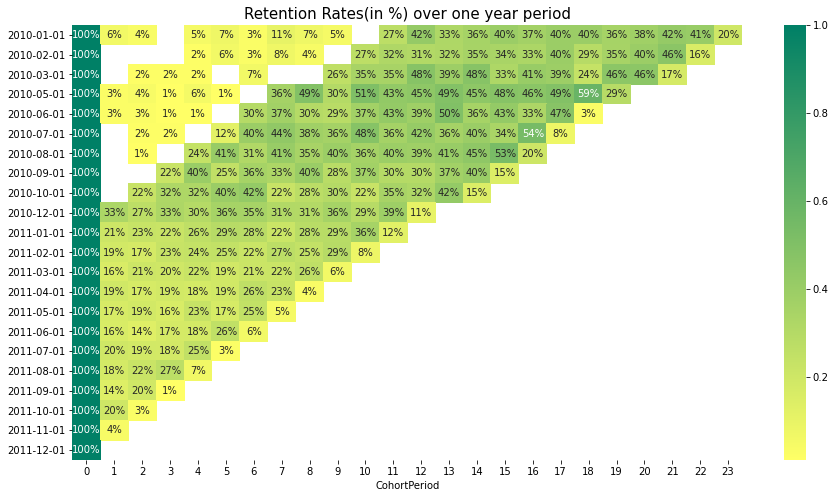

In [28]:
#Build the heatmap or pictorial representation of above table

plt.figure(figsize=(15, 8))
plt.title('Retention Rates(in %) over one year period', size=15)
sns.heatmap(data=retention, annot = True, fmt = '.0%', cmap="summer_r")
plt.show()

In [29]:
df_cohort['Amount'] = df_cohort['UnitPrice']* df_cohort['Quantity']
amount_cohort = df_cohort.pivot_table(index='CohortMonth', columns='CohortPeriod', values='Amount', aggfunc='mean').round(2)
amount_cohort

CohortPeriod,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2010-01-01,24.34,21.70,32.44,NaN,9.70,25.11,19.89,20.61,21.25,13.29,...,31.19,25.75,22.91,19.38,27.19,22.06,24.43,21.51,21.41,17.63
2010-02-01,24.40,NaN,NaN,NaN,113.19,41.61,22.03,35.00,108.56,NaN,...,32.48,29.81,32.42,24.36,22.62,24.13,26.08,26.72,25.53,NaN
2010-03-01,20.72,NaN,9.21,3.86,19.90,NaN,18.88,NaN,NaN,27.06,...,37.04,69.77,94.10,51.03,89.02,53.96,47.47,54.67,NaN,NaN
2010-05-01,12.36,59.75,24.33,63.00,11.36,4.02,NaN,20.12,18.98,19.08,...,17.49,16.95,16.11,12.67,15.74,18.12,NaN,NaN,NaN,NaN
2010-06-01,12.98,26.14,33.46,14.29,8.25,NaN,13.63,13.83,14.76,14.81,...,17.63,20.50,17.23,14.96,30.58,NaN,NaN,NaN,NaN,NaN
2010-07-01,55.80,NaN,1914.24,100.50,NaN,34.17,19.35,31.83,82.61,86.17,...,222.15,88.26,61.34,34.70,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,20.18,NaN,12.90,NaN,17.46,21.34,19.57,22.06,16.46,19.16,...,22.64,23.06,23.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-01,21.15,NaN,NaN,33.88,19.58,20.26,23.80,16.99,25.97,22.09,...,20.15,23.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-01,20.64,NaN,17.94,25.14,26.45,21.07,23.15,31.74,20.42,32.82,...,49.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


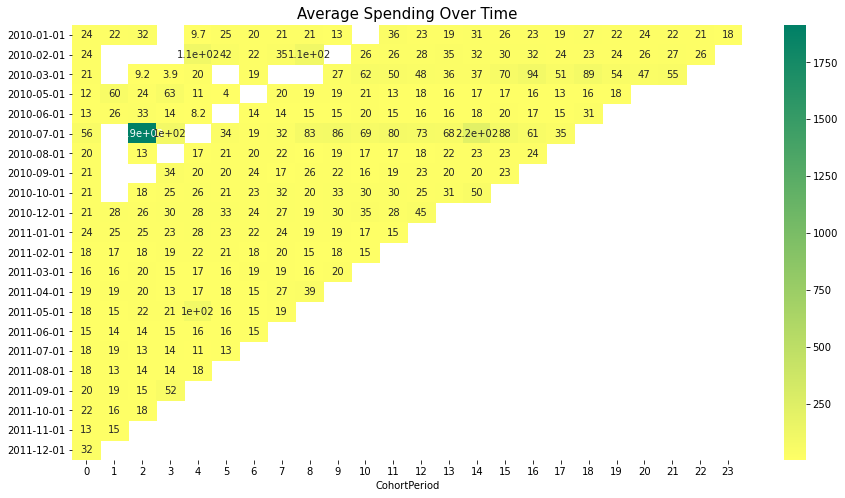

In [30]:
amount_cohort.index = pd.to_datetime(amount_cohort.index).date
plt.figure(figsize=(15, 8))
plt.title('Average Spending Over Time', size=15)
sns.heatmap(data = amount_cohort, annot = True, cmap="summer_r")
plt.show()

##### Observation:
- The above table shows the average amount spent by the group of customers over the period of time.
- ex: For the group of customers of dec'2010 they initially spent 21 but after one month they spent 28 higher than the previous, then they spend 26 after two months and so on.